In [1]:
!pip install seaborn
!pip install wordcloud

In [2]:
import pandas as pd
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
sns.set(color_codes=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathankiflom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('spotify_reviews_sentiment.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              1612 non-null   object 
 1   userName              1612 non-null   object 
 2   userImage             1612 non-null   object 
 3   content               1612 non-null   object 
 4   score                 1612 non-null   int64  
 5   thumbsUpCount         1612 non-null   int64  
 6   reviewCreatedVersion  1612 non-null   object 
 7   at                    1612 non-null   object 
 8   replyContent          114 non-null    object 
 9   repliedAt             114 non-null    object 
 10  appVersion            1612 non-null   object 
 11  content_vader         1612 non-null   object 
 12  content_ml            1539 non-null   object 
 13  cleaned_content       1548 non-null   object 
 14  sentiment_score       1612 non-null   float64
 15  sentiment_label      

Text(0, 0.5, 'Sentiment Score')

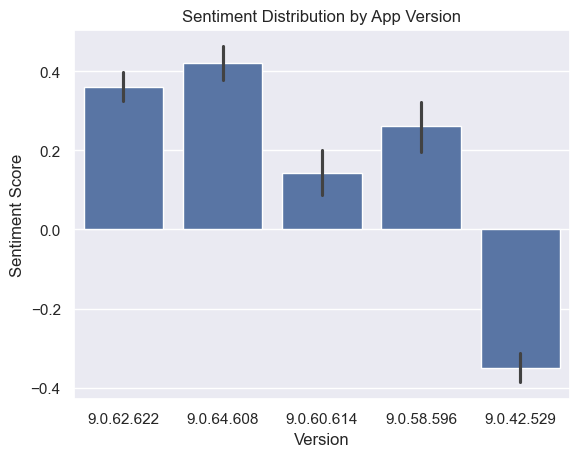

In [ ]:
sns.barplot(x='appVersion', y='sentiment_score', data=data)
plt.title("Sentiment Distribution by App Version")
plt.xlabel("Version")
plt.ylabel("Sentiment Score")

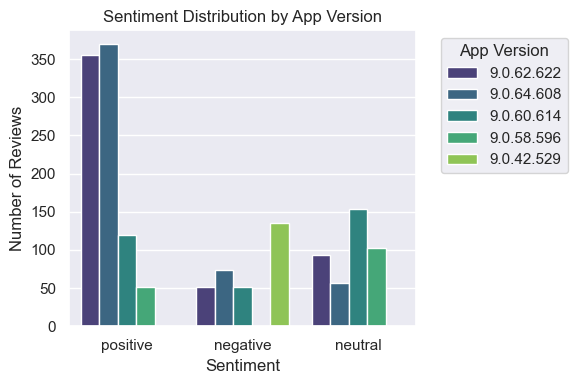

In [ ]:
# Create the plot
plt.figure(figsize=(6, 4))
sns.countplot(data, x='sentiment_label', hue='appVersion', palette='viridis')

# Customize
plt.title("Sentiment Distribution by App Version")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.legend(title='App Version', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("sentiment_by_version.png")
plt.show()

In [ ]:
data['at'] = pd.to_datetime(data['at'])
data = data.dropna(subset=['at'])

In [ ]:
daily_sentiment = data.groupby(data['at'].dt.date)['sentiment_score'].mean().reset_index()
daily_sentiment.columns = ['date', 'avg_sentiment']

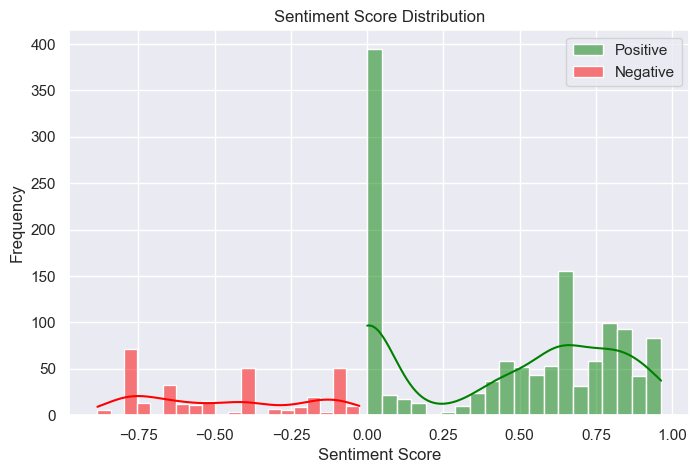

In [ ]:

# Separate positive and negative sentiment scores
positive = data[data['sentiment_score'] >= 0]
negative = data[data['sentiment_score'] < 0]

# Plot both on the same histogram with different colors
plt.figure(figsize=(8,5))
sns.histplot(positive['sentiment_score'], bins=20, color='green', label='Positive', kde=True)
sns.histplot(negative['sentiment_score'], bins=20, color='red', label='Negative', kde=True)

plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

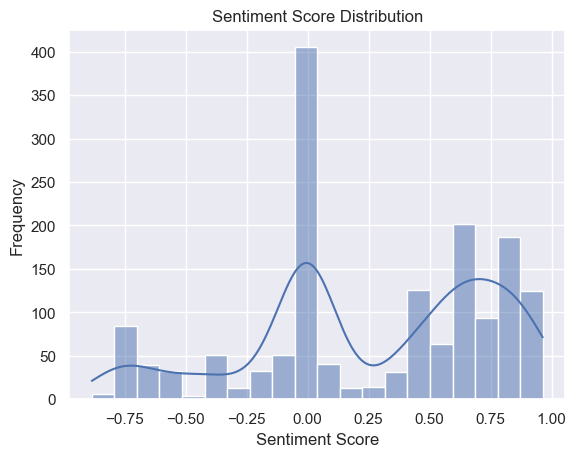

In [ ]:
sns.histplot(data['sentiment_score'], bins=20, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
positive_scores = data['sentiment_score'] >= 0
positive_reviews = data[positive_scores]['content'].dropna()
positive_text = " ".join(positive_reviews)
#ignoring insignificant words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['app','spotify','music','songs'])

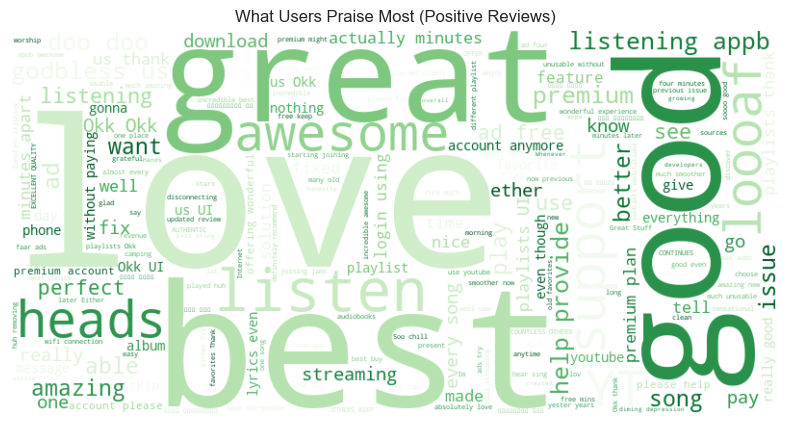

In [ ]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords,
    colormap='Greens'
).generate(positive_text)

#Plotting
plt.figure(figsize=(10, 5))
plt.title("What Users Praise Most (Positive Reviews)")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
negative_scores = data['sentiment_score'] < 0
negative_reviews = data[negative_scores]['content'].dropna()

english_stopwords = set(stopwords.words('english'))
custom_stopwords = english_stopwords.union(['spotify', 'app', 'music', 'song', 'songs', 'and', 'the', 'their','too','this','they','you','for'])  # add yours

In [6]:
# clean and tokenize text
def get_word_counts(text_series, min_word_length=3):
    text = " ".join(text_series).lower()
    words = re.findall(r'\b\w+\b', text)
    words = [w for w in words if len(w) >= min_word_length]
    return Counter(words)

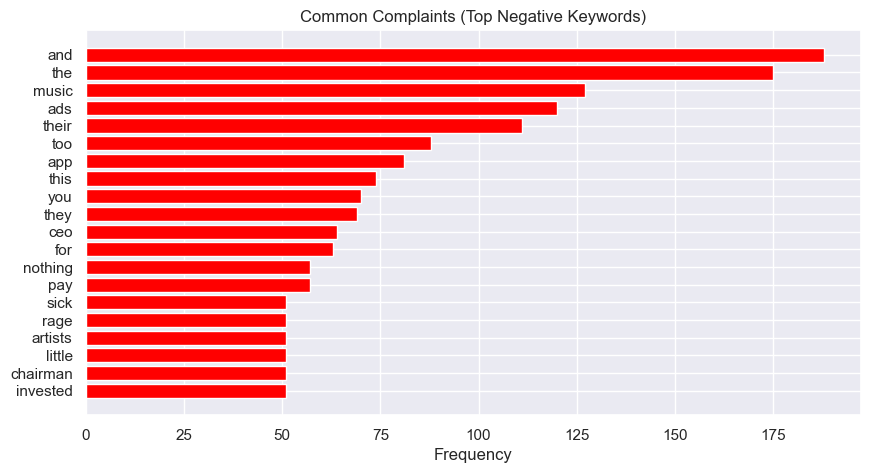

In [7]:
negative_counts = get_word_counts(negative_reviews)
top_negatives = negative_counts.most_common(20)

# Bar chart
words, counts = zip(*top_negatives)
plt.figure(figsize=(10, 5))
plt.barh(words[::-1], counts[::-1], color='red')
plt.title("Common Complaints (Top Negative Keywords)")
plt.xlabel("Frequency")
plt.show()

In [ ]:
bug_keywords = ['crash', 'bug', 'fix', 'error', 'issue', 'problem']
feature_keywords = ['add', 'feature', 'improve', 'update', 'option', 'suggest']
data['is_bug'] = data['content'].str.contains('|'.join(bug_keywords), case=False, na=False)
data['is_feature_request'] = data['content'].str.contains('|'.join(feature_keywords), case=False, na=False)

# Count for bar chart
bug_count = data['is_bug'].sum()
feature_count = data['is_feature_request'].sum()

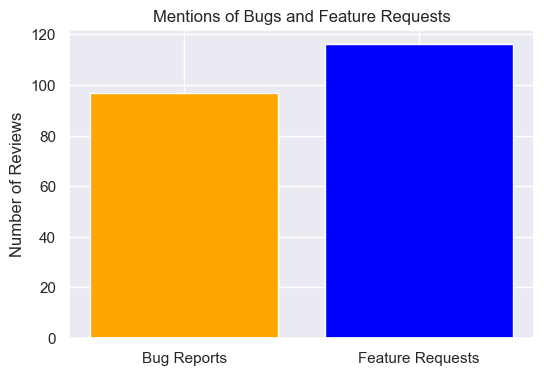

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Bug Reports', 'Feature Requests'], [bug_count, feature_count], color=['orange', 'blue'])
plt.title("Mentions of Bugs and Feature Requests")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
bug_examples = data[data['is_bug']][['content']].head(5)
feature_examples = data[data['is_feature_request']][['content']].head(5)

print("📌 Example Bug Mentions:")
display(bug_examples)

print("\n💡 Example Feature Requests:")
display(feature_examples)

📌 Example Bug Mentions:


,content
37,Better than YouTube music for sure! I do have ...
45,New UI with the play button in the left most j...
103,Better than YouTube music for sure! I do have ...
122,The app was okay at first until I was listenin...
131,Better than YouTube music for sure! I do have ...



💡 Example Feature Requests:


,content
61,The playlist collaborative feature is my favou...
67,@Spotify why is there not play next in the opt...
110,@Spotify why is there not play next in the opt...
125,The playlist collaborative feature is my favou...
154,@Spotify why is there not play next in the opt...
